In [252]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
y1 = [-1.02933389796674E-09,
1.76788500275201E-09,
5.211531526964E-09,
1.2307250501221E-08,
1.4122425603974E-08,
1.28389209457569E-08,
1.15012284759524E-08,]

In [274]:
y2 = [-2.78896871908356E-09,
3.65353824174948E-10,
1.07365258789958E-09,
5.68353254496137E-09,
7.86108239965975E-09,
7.2909807452816E-09,
6.84363137369548E-09,]

In [275]:
y1 = np.array(y1)*1e9
y1 = np.around(y1 - y1[0],2)

y2 = np.array(y2)*1e9*1.3
y2 = np.around(y2 - y2[0],2)

In [276]:
Y1 = [list(np.around(y1 + np.random.rand(1,len(y1))*np.log(y1+1), 2)[0]) for i in range(3)]
Y2 = [list(np.around(y2 + np.random.rand(1,len(y2))*np.log(y2+1), 2)[0]) for i in range(3)]

In [277]:
X = [0.0,
20.0,
50.0,
200.0,
500.0,
1000.0,
2000.0,]

In [278]:
df = pd.DataFrame()
for y,f in zip([Y1,Y2],["A","B"]):
    for yy,r in zip(y,["R1","R2","R3"]):
        df = df.append(pd.DataFrame({"x":X, "y":yy, "f":f,"r":r}))
    

/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/4191469147.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x":X, "y":yy, "f":f,"r":r}))
/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/4191469147.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x":X, "y":yy, "f":f,"r":r}))
/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/4191469147.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x":X, "y":yy, "f":f,"r":r}))
/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/4191469147.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [279]:
from pingouin import ancova, anova

In [287]:
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


In [302]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Run LMER
model = smf.mixedlm("y ~ x + C(r)",
                    df,
                    groups= "f").fit()

model.summary()


/Users/niudu/miniconda3/envs/pylab/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/niudu/miniconda3/envs/pylab/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/niudu/miniconda3/envs/pylab/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/niudu/miniconda3/envs/pylab/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/niudu/miniconda3/envs/pylab/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Li

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: y        
No. Observations: 42      Method:             REML     
No. Groups:       2       Scale:              24.7949  
Min. group size:  21      Log-Likelihood:     -127.2753
Max. group size:  21      Converged:          No       
Mean group size:  21.0                                 
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      6.991    1.462 4.780 0.000  4.125  9.857
C(r)[T.R2]     0.251    1.882 0.134 0.894 -3.437  3.940
C(r)[T.R3]     0.113    1.882 0.060 0.952 -3.576  3.802
x              0.005    0.001 4.562 0.000  0.003  0.007
f Var          0.000                                   
=======================================================

"""

<AxesSubplot:xlabel='f', ylabel='y'>

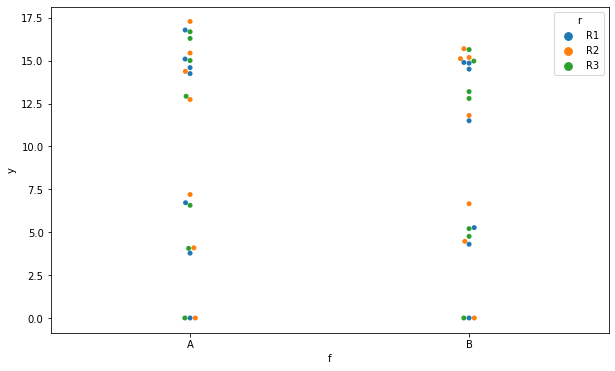

In [304]:
f,ax = plt.subplots(figsize = (10,6))
sns.swarmplot(x = "f", y = "y", hue = 'r', data = df, ax = ax)

In [281]:
anova(data = df, dv = 'y', between = ['f','r'])

,Source,SS,DF,MS,F,p-unc,np2
0,f,4.061038,1,4.061038,0.100580,0.752967,0.002786
1,r,0.444057,2,0.222029,0.005499,0.994517,0.000305
2,f * r,0.528362,2,0.264181,0.006543,0.993480,0.000363
3,Residual,1453.542600,36,40.376183,NaN,NaN,NaN


In [282]:
ancova(data=df, dv='y', covar='x', between='f', effsize="np2")

,Source,SS,DF,F,p-unc,np2
0,f,4.061038,1,0.168743,0.68348,0.004308
1,x,515.925144,1,21.437564,0.00004,0.354706
2,Residual,938.589875,39,NaN,NaN,NaN


In [283]:
ancova(data=df, dv='y', covar='x', between='r')

,Source,SS,DF,F,p-unc,np2
0,r,0.444057,2,0.008955,0.991087,0.000471
1,x,515.925144,1,20.807698,0.000052,0.353826
2,Residual,942.206856,38,NaN,NaN,NaN


In [284]:
def platt_equation_wo_inhibition(coef,x,y):

    return coef[0]*(1-np.exp(-(coef[1]*x)/coef[0])) - y 

def platt_equation_w_inhibition(coef,x,y):

    return coef[0]*(1-np.exp(-(coef[1]*x)/coef[0]))*np.exp((-1*coef[2]*x)/coef[0]) - y

In [ ]:
def r_squared(yhat, y):
    SSE = sum(np.array(yhat - y)**2)
    SST = sum(np.array(yhat - np.mean(y))**2)
    return 1-(SSE/SST)

/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/1382705241.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(pd.DataFrame(list(res_lsq_2.x) + [r_squared(platt_equation_w_inhibition(res_lsq_2.x,X,0),Y)] + ["A",f"R{i+1}"]).T)
/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/1382705241.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(pd.DataFrame(list(res_lsq_2.x) + [r_squared(platt_equation_w_inhibition(res_lsq_2.x,X,0),Y)] + ["B",f"R{i+1}"]).T)
/var/folders/np/c6spvh053sj7w043zdpq_27h0000gn/T/ipykernel_67333/1382705241.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(pd.DataFrame(list(res_lsq_2.x) + [r_squar

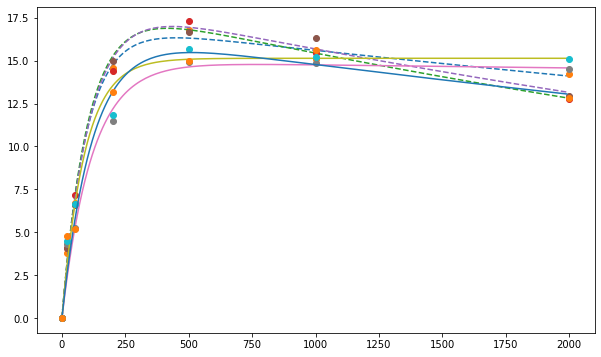

In [324]:
def div0(a, b):
    if b == 0:
        return 1.
    return a/b

df_coef = pd.DataFrame()
f,ax = plt.subplots(figsize = (10,6))
for i,Y in enumerate(Y1):
    X = np.array(X, dtype = float)
    Y = np.array(Y, dtype = float)
    assert len(X) == len(Y) >= 3, "X and Y length must be equal with at least 3 data points"

    init_ymax = Y.max()
    init_slope = div0(Y[1]-Y[0],X[1]-X[0])
    # res_lsq_1 = least_squares(platt_equation_wo_inhibition, [init_ymax, init_slope, 0], loss='soft_l1', bounds=(0,np.inf),  args=(X, Y)) 
    res_lsq_2 = least_squares(platt_equation_w_inhibition, [init_ymax, init_slope, 0], loss='soft_l1', bounds=(0,np.inf),  args=(X, Y)) 
    df_coef = df_coef.append(pd.DataFrame(list(res_lsq_2.x) + [r_squared(platt_equation_w_inhibition(res_lsq_2.x,X,0),Y)] + ["A",f"R{i+1}"]).T)
    # ax.plot(np.arange(0,2000,10),platt_equation_wo_inhibition(res_lsq_1.x,np.arange(0,2000,10),0))
    ax.plot(np.arange(0,2000,10),platt_equation_w_inhibition(res_lsq_2.x,np.arange(0,2000,10),0), '--')
    ax.plot(X,Y,'o')
    
for i,Y in enumerate(Y2):
    X = np.array(X, dtype = float)
    Y = np.array(Y, dtype = float)
    assert len(X) == len(Y) >= 3, "X and Y length must be equal with at least 3 data points"

    init_ymax = Y.max()
    init_slope = div0(Y[1]-Y[0],X[1]-X[0])
    # res_lsq_1 = least_squares(platt_equation_wo_inhibition, [init_ymax, init_slope, 0], loss='soft_l1', bounds=(0,np.inf),  args=(X, Y)) 
    res_lsq_2 = least_squares(platt_equation_w_inhibition, [init_ymax, init_slope, 0], loss='soft_l1', bounds=(0,np.inf),  args=(X, Y)) 
    df_coef = df_coef.append(pd.DataFrame(list(res_lsq_2.x) + [r_squared(platt_equation_w_inhibition(res_lsq_2.x,X,0),Y)] + ["B",f"R{i+1}"]).T)
    # ax.plot(np.arange(0,2000,10),platt_equation_wo_inhibition(res_lsq_1.x,np.arange(0,2000,10),0))
    ax.plot(np.arange(0,2000,10),platt_equation_w_inhibition(res_lsq_2.x,np.arange(0,2000,10),0), '-')
    ax.plot(X,Y,'o')

df_coef.columns = ["max",'alpha','beta','gof',"factor","repeat"]

In [336]:
df_coef = df_coef.convert_dtypes()

In [337]:
df_coef['sat'] = df_coef['max']/df_coef['alpha']

In [333]:
anova(data = df_coef, dv = 'max', between = ['factor'])

,Source,ddof1,ddof2,F,p-unc,np2
0,factor,1,4,12.332516,0.024633,0.75509


In [334]:
anova(data = df_coef.convert_dtypes(), dv = 'alpha', between = ['factor'])

,Source,ddof1,ddof2,F,p-unc,np2
0,factor,1,4,5.182279,0.085118,0.564378


In [335]:
anova(data = df_coef.convert_dtypes(), dv = 'beta', between = ['factor'])

,Source,ddof1,ddof2,F,p-unc,np2
0,factor,1,4,5.788658,0.073877,0.591364


In [338]:
anova(data = df_coef, dv = 'sat', between = ['factor'])

,Source,ddof1,ddof2,F,p-unc,np2
0,factor,1,4,0.246559,0.645558,0.058061


In [246]:
res_lsq_2

 active_mask: array([ 0,  0, -1])
        cost: 1.6885463382150643
         fun: array([ 0.        , -1.63273688,  0.12362078,  0.88183705, -0.18125344,
        0.3965575 , -0.89341372])
        grad: array([-1.29244223e-05,  1.00393915e-03,  9.31676382e+02])
         jac: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.05352005e-02,  5.83729239e+00, -1.71190487e+00],
       [ 1.34691010e-01,  2.59900209e+01, -2.34444560e+01],
       [ 4.72300261e-01,  9.92554686e+00, -1.19985984e+02],
       [ 9.64347905e-01,  7.87422706e-01, -4.87236411e+02],
       [ 8.96214006e-01,  2.33319137e-03, -8.96243411e+02],
       [ 6.43981906e-01,  0.00000000e+00, -1.28796208e+03]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 9
        njev: 9
  optimality: 0.0001427334655130976
      status: 2
     success: True
           x: array([1.10565863e+01, 1.42173423e-01, 1.55340122e-20])